<a href="https://colab.research.google.com/github/Took254312/workshop8/blob/main/Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 32.5 MB/s 


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [ ]:
import pathlib
path =  "drive/My Drive/Colab Notebooks/Fish" 
data_dir = pathlib.Path(path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

118


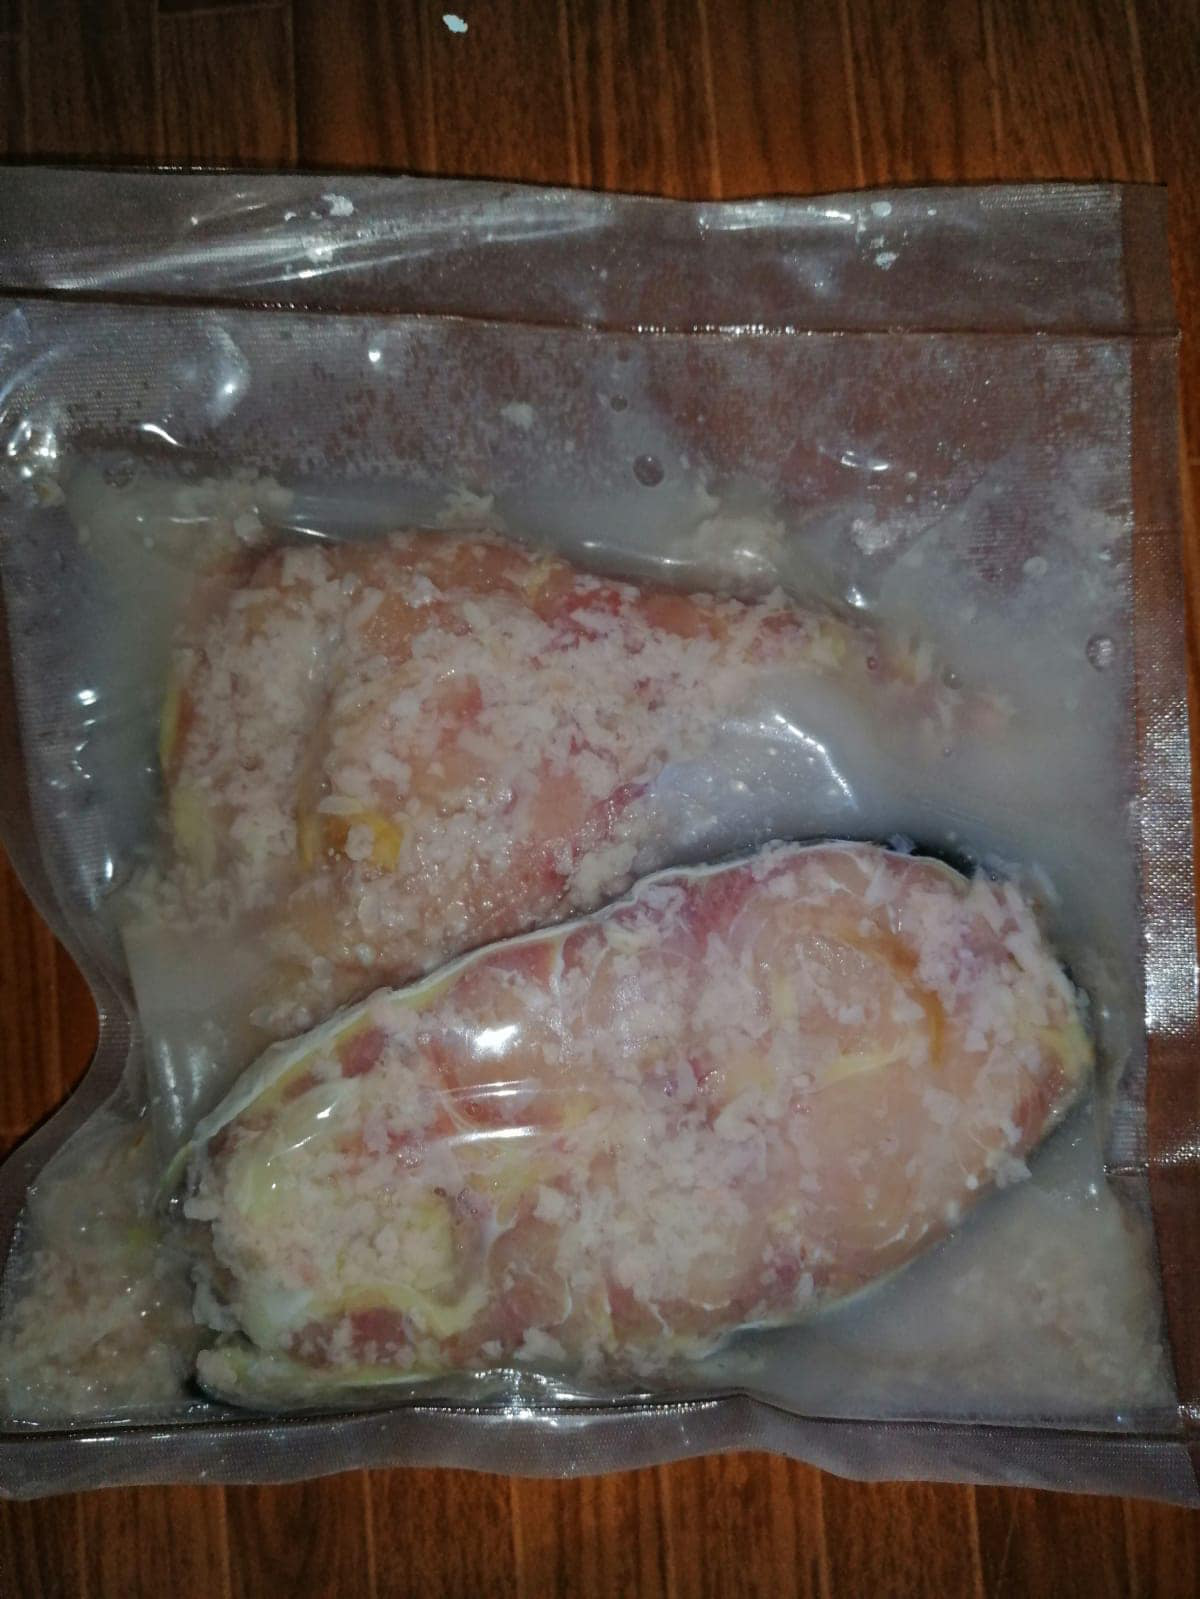

In [ ]:
Fish1 = list(data_dir.glob('Fish1/*')) 
PIL.Image.open(str(Fish1[26]))

In [ ]:
batch_size = 32
img_height = 354
img_width = 400

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 118 files belonging to 4 classes.
Using 95 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 118 files belonging to 4 classes.
Using 23 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Fish1', 'Notfound', 'Packfish', 'Slicedfish']


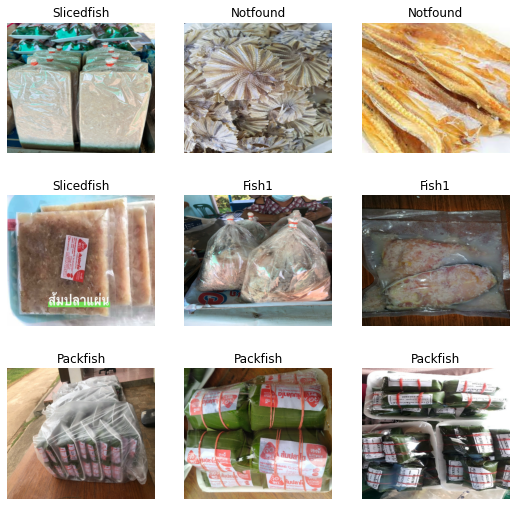

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [32]:
num_classes = 4
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [33]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 354, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 354, 400, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 177, 200, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 200, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 100, 32)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 100, 64)       1

In [35]:
epochs=10
history = model.fit(train_ds,
validation_data=val_ds,
epochs=epochs)

Epoch 1/10
3/3 [==============================] - 22s 8s/step - loss: 10.8010 - accuracy: 0.1789 - val_loss: 5.2017 - val_accuracy: 0.1739
Epoch 2/10
3/3 [==============================] - 14s 4s/step - loss: 2.3948 - accuracy: 0.3684 - val_loss: 1.2573 - val_accuracy: 0.4348
Epoch 3/10
3/3 [==============================] - 14s 4s/step - loss: 1.3200 - accuracy: 0.3053 - val_loss: 1.4703 - val_accuracy: 0.3478
Epoch 4/10
3/3 [==============================] - 13s 4s/step - loss: 1.2273 - accuracy: 0.5474 - val_loss: 1.3900 - val_accuracy: 0.3478
Epoch 5/10
3/3 [==============================] - 14s 4s/step - loss: 1.0798 - accuracy: 0.5053 - val_loss: 1.3077 - val_accuracy: 0.3043
Epoch 6/10
3/3 [==============================] - 14s 4s/step - loss: 0.9299 - accuracy: 0.7263 - val_loss: 1.2275 - val_accuracy: 0.3913
Epoch 7/10
3/3 [==============================] - 14s 4s/step - loss: 0.7702 - accuracy: 0.7895 - val_loss: 1.1186 - val_accuracy: 0.4348
Epoch 8/10
3/3 [=================

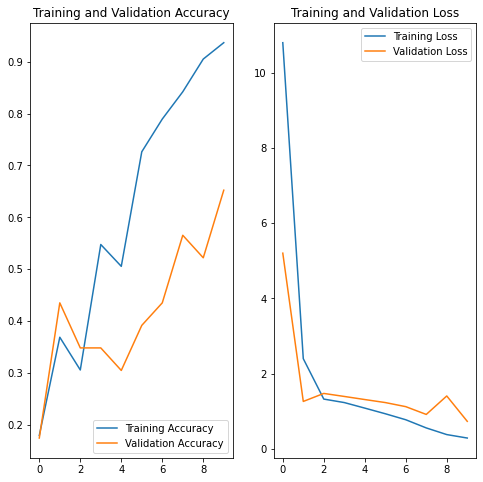

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

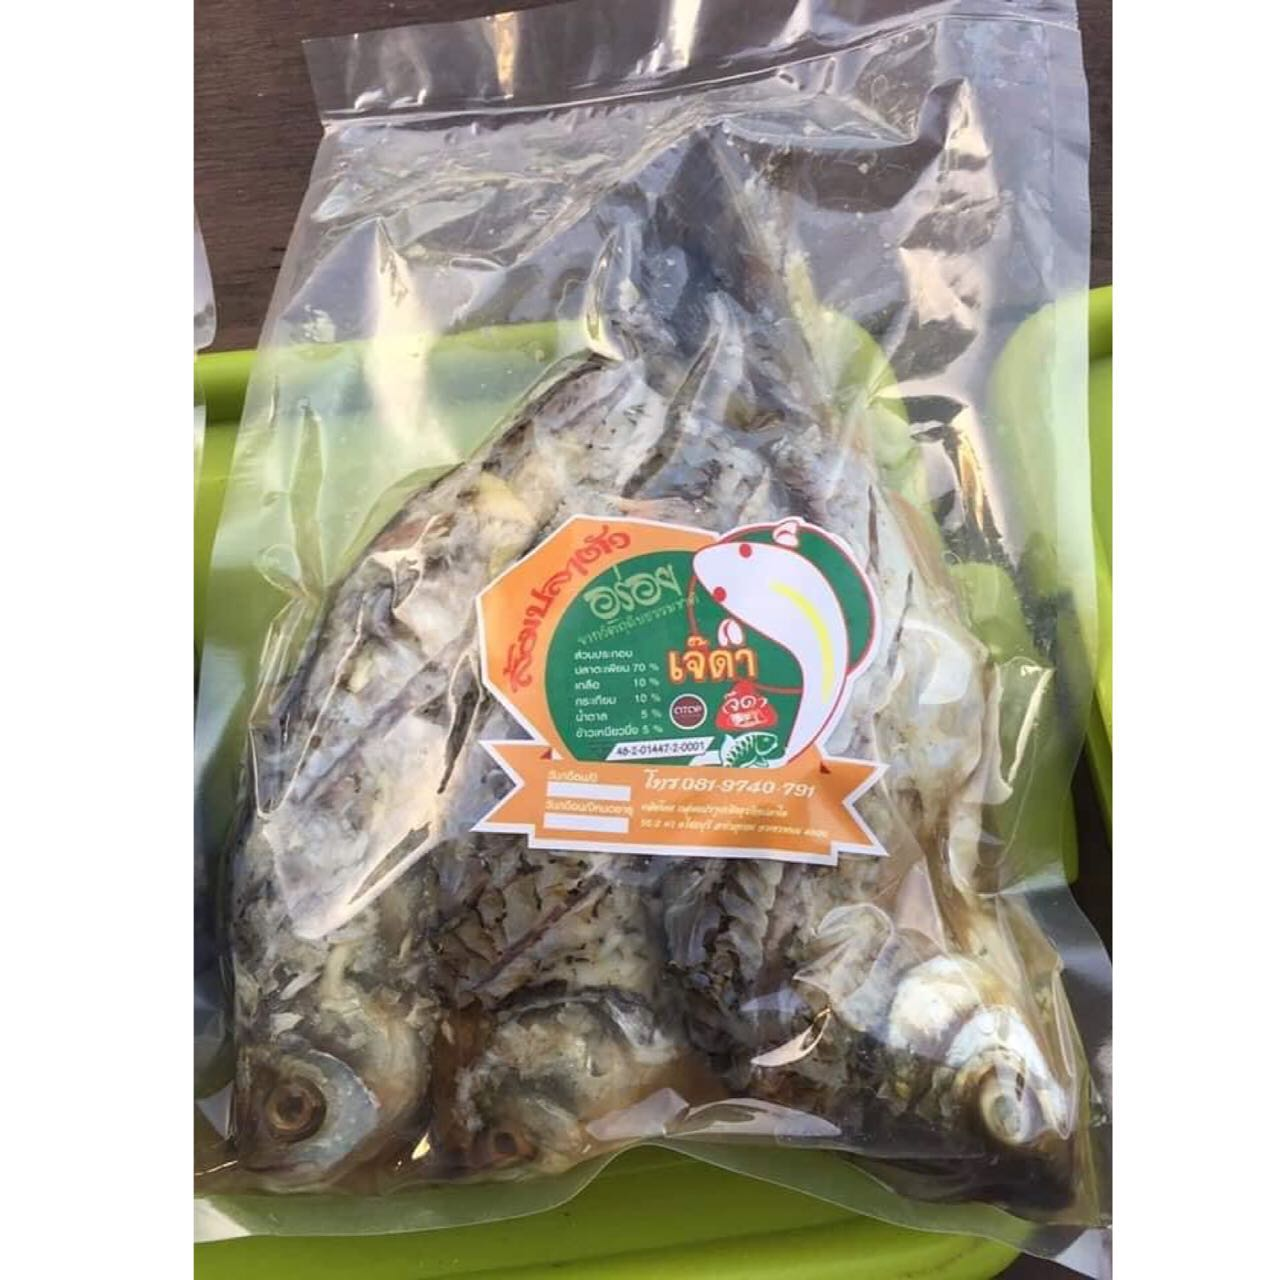

This image most likely belongs to Fish1 with a 87.78 percent confidence.


In [38]:
path = "/content/drive/My Drive/Colab Notebooks/Fish/Fish1/fish2.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

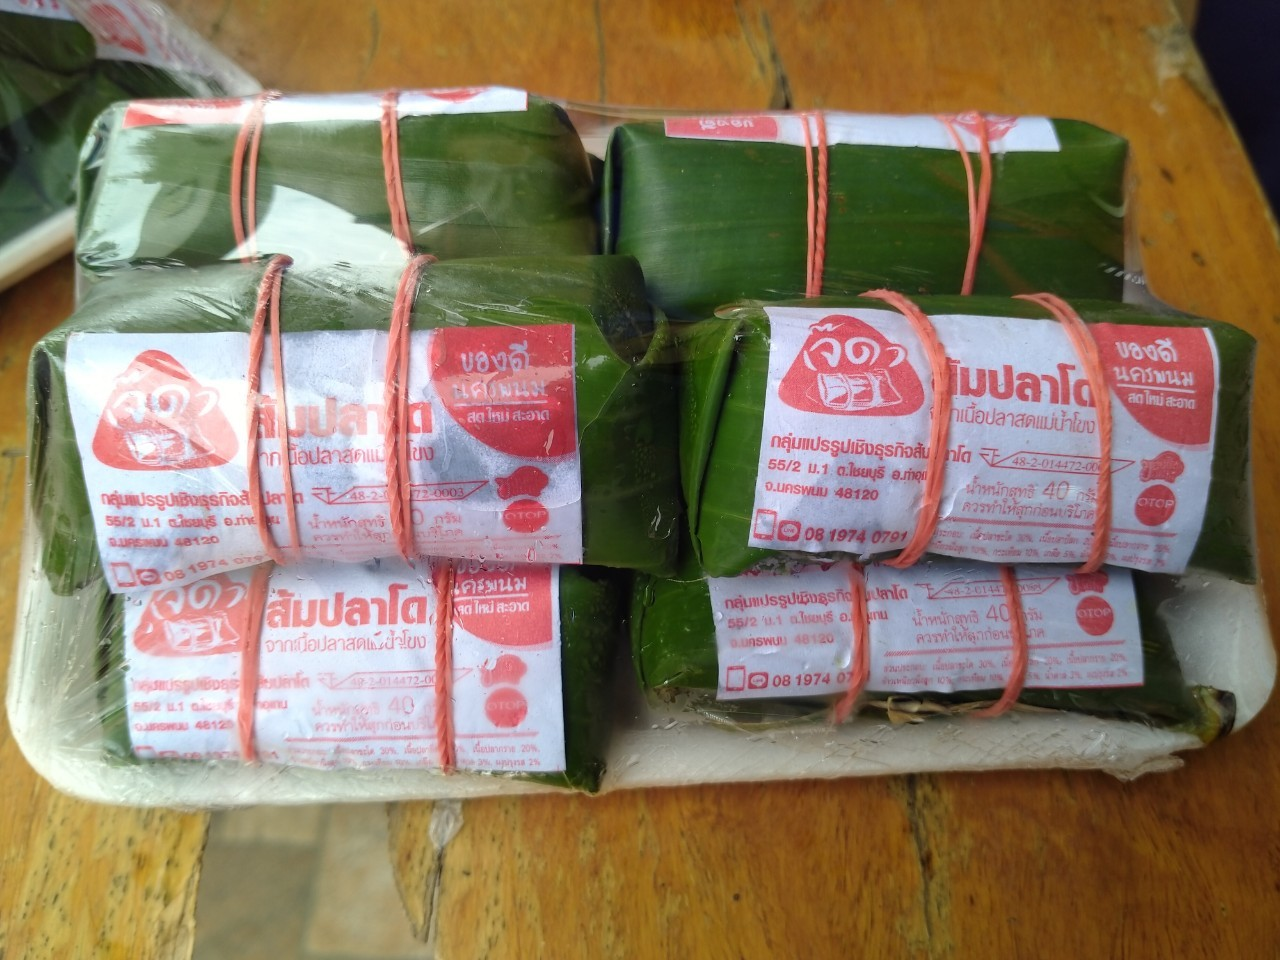

This image most likely belongs to Packfish with a 77.79 percent confidence.


In [40]:
path = "/content/drive/My Drive/Colab Notebooks/Fish/Packfish/Packfish39.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

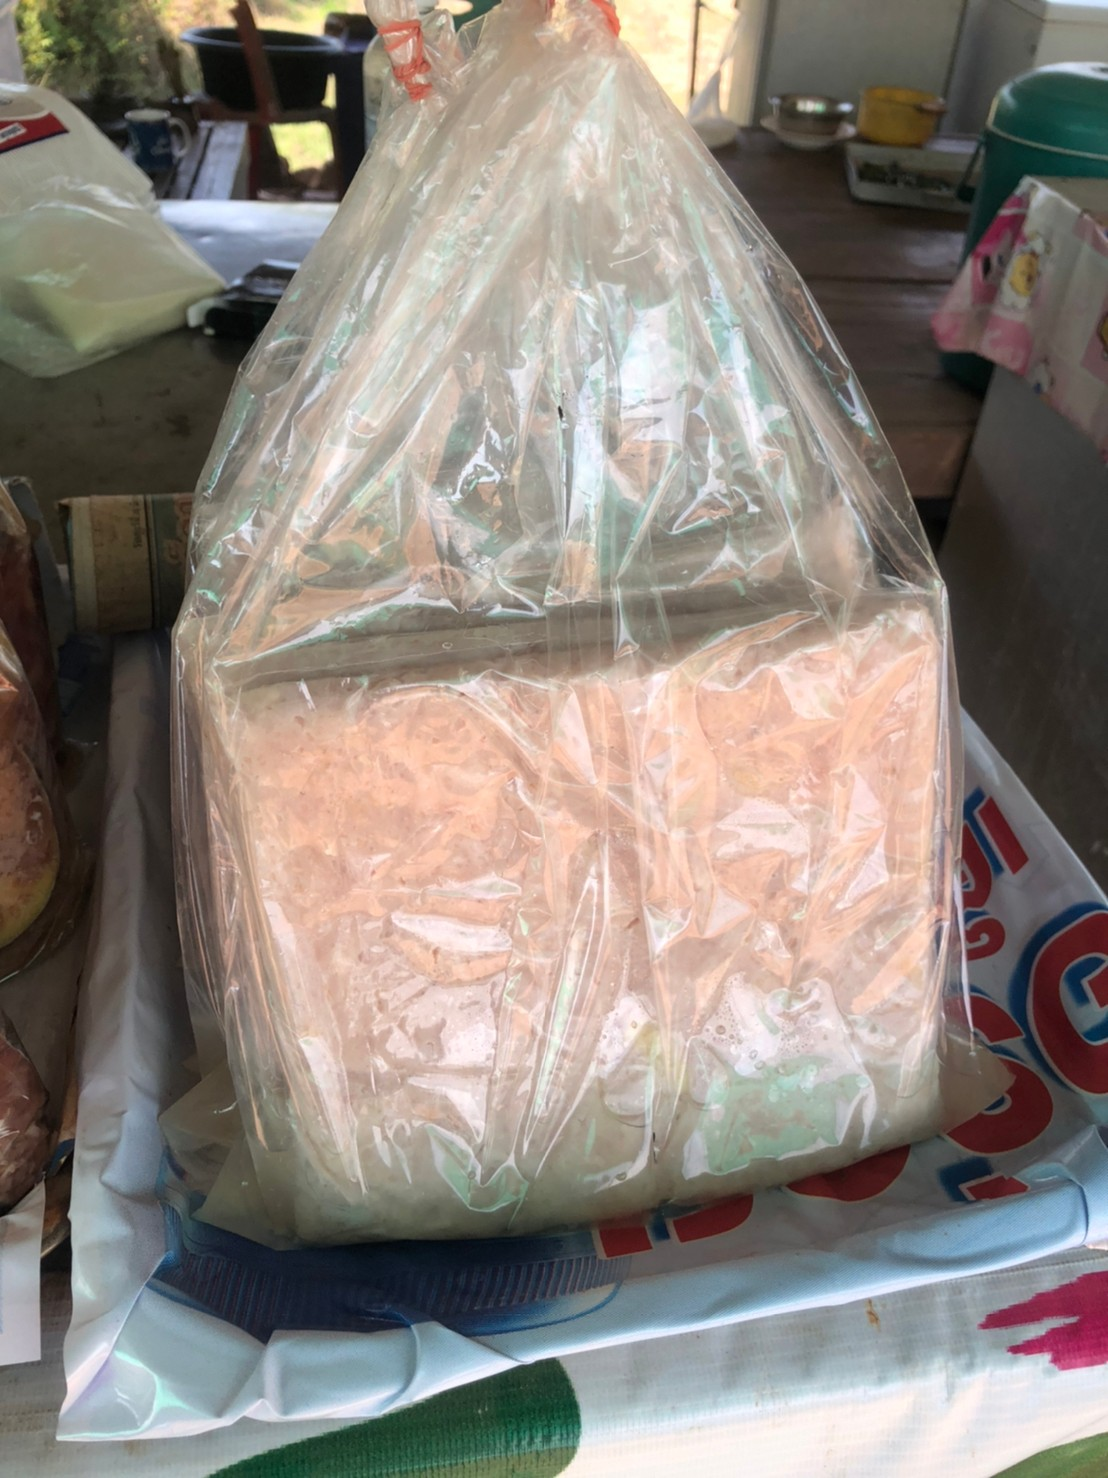

This image most likely belongs to Slicedfish with a 84.35 percent confidence.


In [42]:
path = "/content/drive/My Drive/Colab Notebooks/Fish/Slicedfish/Slicedfish22.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

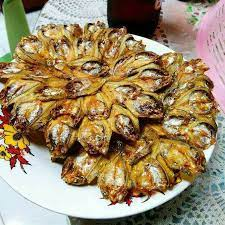

This image most likely belongs to Notfound with a 99.59 percent confidence.


In [44]:
path = "/content/drive/My Drive/Colab Notebooks/Fish/Notfound/Driedfish10.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))